In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [27]:
life = pd.read_csv('Life_Expectancy_Data.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [28]:
life.shape

(2938, 22)

In [29]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [30]:
life.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [31]:
life.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# Handling missing values 
I will use Simple Imputer for 7 coumns which has few missing values because I don't want to drop any columns. They are;

Life expectancy                     10

Adult Mortality                     10

BMI                                34

Polio                               19

Diphtheria                          19

thinness  1-19 years               34

 thinness 5-9 years                 34

In [32]:
few_missing_values = ['Life expectancy ','Adult Mortality',' BMI ','Polio','Diphtheria ',' thinness  1-19 years',' thinness 5-9 years']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
life[few_missing_values] = imp.fit_transform(life[few_missing_values])
life[few_missing_values].isna().sum()

Life expectancy          0
Adult Mortality          0
 BMI                     0
Polio                    0
Diphtheria               0
 thinness  1-19 years    0
 thinness 5-9 years      0
dtype: int64

To fill missing values for alcohol, I will group by country because alcohol factor relate with their respective country situation. 

In [33]:
grouped_mean = life.groupby('Country')['Alcohol'].transform('mean')
life['Alcohol']=life['Alcohol'].fillna(grouped_mean)
print(life['Alcohol'].isna().sum())

17


In [34]:
#It still have 17 missing values because some countries have all missing values for Alcohol. Thus, I will fill the remaining missing values with the overall mean.
mean = life['Alcohol'].mean()
life['Alcohol'] = life['Alcohol'].fillna(mean)
print(life['Alcohol'].isnull().sum())

0


#Now, 6 columns are left which has missing values. 

Hepatitis B                        553

Total expenditure                  226

GDP                                448

Population                         652
 
Income composition of resources    167

Schooling                          163

For 'total expenditure', 'Income composition of resources' and 'schooling', I will simply fill with mean. But for 'Hepatitis B', 'GDP', 'Population', and , I will fill with median because there are very huge gap between minimum and maximum values. 

In [35]:
cols = ['Total expenditure', 'Income composition of resources', 'Schooling']
life[cols] = life[cols].fillna(life[cols].mean())
print(life[cols].isnull().sum())

Total expenditure                  0
Income composition of resources    0
Schooling                          0
dtype: int64


In [36]:
cols_median = ['Hepatitis B', 'GDP', 'Population']
life[cols_median] = life[cols_median].fillna(life[cols_median].median())
print(life[cols_median].isnull().sum())

Hepatitis B    0
GDP            0
Population     0
dtype: int64


In [37]:
#Final check for missing values
life.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Feature Engineering
My target label is 'Life expectancy' and there are still 21 features which might make algorithm confused. So, I will check correlcation first to decide how many features should I condsider to train the model.  

In [38]:
number_col = life.select_dtypes(include=['float64','int64'])
correlation = number_col.corr()['Life expectancy ']
print(correlation)

Year                               0.169623
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.404155
percentage expenditure             0.381791
Hepatitis B                        0.170555
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430895
Population                        -0.028845
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy , dtype: float64


For rest two categorical columns which are country and status, I will drop country column because country column has too many unique values. Turning countries into numbers can confuse the model because the numbers don’t have a real meaning. Dropping country helps the model focus on important numeric features that actually affect life expectancy. But, for status, I will use label encoder as there are only two unique values. 

In [39]:
drop_categorial = ['Country']   
life = life.drop(drop_categorial,axis=1)

In [40]:
le = LabelEncoder()
life['Status_encoded'] = le.fit_transform(life['Status'])
life[['Status', 'Status_encoded']].head()

,Status,Status_encoded
0,Developing,1
1,Developing,1
2,Developing,1
3,Developing,1
4,Developing,1


In [41]:
#In dropping list, I will add Year, Measles, Population and infant deaths which are not useful for prediction.
life = life.drop('Status', axis=1) #I make sure to drop old status column. 
drop_features = ['Year','Measles ','Population','infant deaths']
life =life.drop(drop_features,axis=1)
life.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded
0,65.0,263.0,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,1
1,59.9,271.0,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,1
2,59.9,268.0,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,1
3,59.5,272.0,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,1
4,59.2,275.0,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,1


Although I have tested the trained model successfully and the app runs correctly, users will need to input 16 separate options to make a prediction. This can be time-consuming and boring. I hadn't witnessed feature extraction that I focused on model performance. After running the app, I have noticed that it will be better to combine the features into same category, making the input process more efficient, intuitive, and user-friendly.

In [42]:
life['Immunization'] = life[['Hepatitis B', 'Polio', 'Diphtheria ']].mean(axis=1)
life = life.drop(columns=['Hepatitis B', 'Polio', 'Diphtheria '])
print(life.head())

   Life expectancy   Adult Mortality  Alcohol  percentage expenditure   BMI   \
0              65.0            263.0     0.01               71.279624   19.1   
1              59.9            271.0     0.01               73.523582   18.6   
2              59.9            268.0     0.01               73.219243   18.1   
3              59.5            272.0     0.01               78.184215   17.6   
4              59.2            275.0     0.01                7.097109   17.2   

   under-five deaths   Total expenditure   HIV/AIDS         GDP  \
0                  83               8.16        0.1  584.259210   
1                  86               8.18        0.1  612.696514   
2                  89               8.13        0.1  631.744976   
3                  93               8.52        0.1  669.959000   
4                  97               7.87        0.1   63.537231   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                 

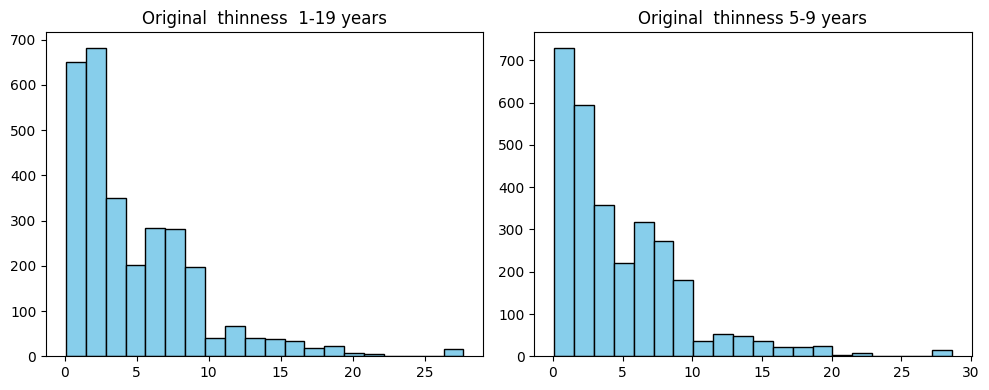

In [43]:
#Before scaling, I will visualize ' thinness  1-19 years' and ' thinness 5-9 years' to know whcih scaling should I use. 
features = [' thinness  1-19 years', ' thinness 5-9 years']
plt.figure(figsize=(10,4))
for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    plt.hist(life[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original {col}')
plt.tight_layout()
plt.show()

Since they don't have bell shape, I will use min-max scaling. These two thinness features belong to the same category, so I will combine them.

First, I will apply log transformation before doing Min-Max scaling to reduce skewness and bring them to the same scale.

Then, I create a single feature (thinness_mean) by averaging both values.

Finally, I drop the original columns to avoid multicollinearity.

In [44]:
life['thinness_1_19_log'] = np.log1p(life[' thinness  1-19 years'])
life['thinness_5_9_log'] = np.log1p(life[' thinness 5-9 years'])

In [45]:
scaler = MinMaxScaler()
life[['thinness_1_19_log', 'thinness_5_9_log']] = scaler.fit_transform(life[['thinness_1_19_log', 'thinness_5_9_log']])
life['thinness_mean'] = life[['thinness_1_19_log', 'thinness_5_9_log']].mean(axis=1)

life = life.drop(columns=[' thinness  1-19 years', ' thinness 5-9 years'])
life = life.drop(columns=['thinness_1_19_log', 'thinness_5_9_log'])

# Spliting dataset into train and test

In [46]:
X = life.drop('Life expectancy ',axis=1)
y = life['Life expectancy ']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2350, 13), (2350,), (588, 13), (588,))

## Linear Regression Model

In [47]:
linear = LinearRegression()
linear

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
linear.fit(X_train, y_train)
linear

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
results = linear.predict(X_test)
results

array([68.43695648, 76.95439113, 72.78164687, 78.07335806, 48.66573125,
       50.29197945, 68.40216834, 71.67724285, 75.04486621, 54.46376869,
       53.52010366, 63.07112306, 64.5820256 , 70.25409538, 70.85152555,
       62.9686841 , 56.67866983, 80.82087237, 68.13676029, 82.17841513,
       81.58632181, 84.90526881, 71.00218721, 69.96050597, 70.24929937,
       68.2454698 , 60.10908382, 60.26658987, 79.78199214, 72.01918354,
       64.72059546, 75.36935735, 66.07726937, 68.79326797, 80.43799404,
       56.48965848, 66.83848119, 74.28123159, 61.70404704, 76.44911527,
       57.93945551, 63.71932771, 74.90658701, 82.23281101, 76.57366298,
       58.04425149, 80.07367477, 70.23949913, 66.1944763 , 66.51956511,
       60.85145532, 61.69009979, 79.14629071, 72.51339837, 73.09395922,
       59.45814313, 75.60300927, 69.96653423, 67.37164798, 68.38105107,
       77.16789062, 56.38212398, 73.5843996 , 69.37162452, 55.66879729,
       52.87168176, 53.06731555, 80.19033264, 58.21056255, 77.80

In [50]:
mae = mean_absolute_error(y_test, results)
mse=mean_squared_error(y_test, results)
r2 = r2_score(y_test, results)
print(mae)
print(mse)
print(r2)

2.928930315897277
16.346444271437637
0.811318843143918


In [51]:
print(y_test.describe())

count    588.000000
mean      69.016922
std        9.315732
min       43.800000
25%       62.775000
50%       71.600000
75%       75.500000
max       89.000000
Name: Life expectancy , dtype: float64


In [52]:
for y, y_cap in zip(y_test, results):
    print(f"Actual value {y}, predicted value: {y_cap}")

Actual value 73.7, predicted value: 68.43695647741366
Actual value 75.9, predicted value: 76.95439113280533
Actual value 74.2, predicted value: 72.78164686564074
Actual value 76.8, predicted value: 78.0733580570164
Actual value 51.9, predicted value: 48.66573124750248
Actual value 49.6, predicted value: 50.2919794477683
Actual value 67.4, predicted value: 68.40216833868482
Actual value 73.9, predicted value: 71.67724285231606
Actual value 77.2, predicted value: 75.04486621038512
Actual value 55.0, predicted value: 54.46376869150285
Actual value 51.4, predicted value: 53.52010366060653
Actual value 53.3, predicted value: 63.071123061380405
Actual value 58.1, predicted value: 64.58202559889622
Actual value 75.0, predicted value: 70.25409537870854
Actual value 69.1, predicted value: 70.85152555246539
Actual value 62.5, predicted value: 62.96868410411526
Actual value 57.9, predicted value: 56.67866983151789
Actual value 79.1, predicted value: 80.82087236997975
Actual value 72.0, predicted 

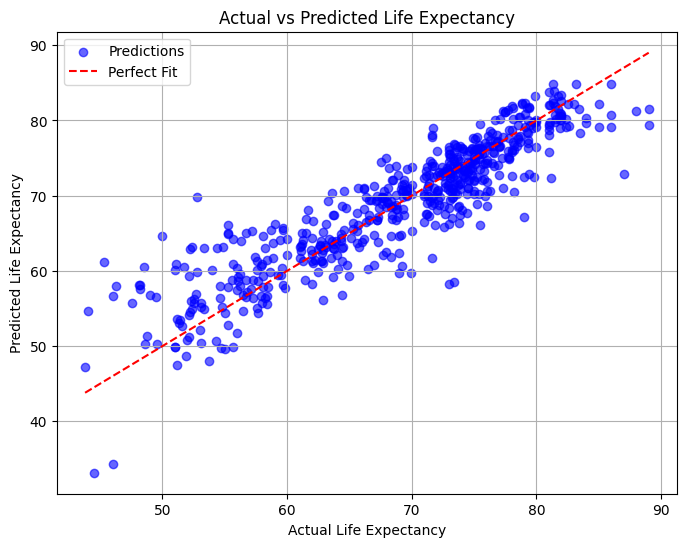

In [53]:
#Visualize predicted model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, results, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--", label="Perfect Fit")

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()

The Linear Regression model demonstrates strong predictive performance, getting an MAE of 2.92, meaning it predicts life expectancy within about 3 years on average. The R2 score of 0.81 indicates that the model explains 81% of the variance in life expectancy across the dataset. Predictions closely follow the actual values, with most differences being small and consistent, reflecting good generalization on unseen data. Thus, the model is accurate and reliable enough for deployment in a web-based prediction application.

In [54]:
#Save model, label encoder, and column order in one file
model_package = {
    "model": linear,                     
    "label_encoder": le,                 
    "columns": X_train.columns.tolist()}
with open("life_expectancy_app.pkl", "wb") as f:
    pickle.dump(model_package, f)
print("Model saved successfully as life_expectancy_app.pkl")

Model saved successfully as life_expectancy_app.pkl
